In [55]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [56]:
test_df = pd.read_csv("C:/Users/Alejandro/Downloads/testing_set.csv",low_memory=False)
train_df = pd.read_csv("C:/Users/Alejandro/Downloads/training_set.csv",low_memory=False)

train_df.shape,test_df.shape

((12000, 10), (3000, 9))

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   train_idx       12000 non-null  int64  
 1   client_ID       12000 non-null  object 
 2   gender          12000 non-null  object 
 3   age             12000 non-null  object 
 4   martial_status  12000 non-null  object 
 5   location        12000 non-null  object 
 6   products_count  12000 non-null  int64  
 7   monthly_count   12000 non-null  int64  
 8   mean_spending   12000 non-null  float64
 9   label           12000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 937.6+ KB


In [58]:
train_df = train_df.drop(columns=['train_idx','client_ID'])

In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   test_idx        3000 non-null   int64  
 1   client_ID       3000 non-null   object 
 2   gender          3000 non-null   object 
 3   age             3000 non-null   object 
 4   martial_status  3000 non-null   object 
 5   location        3000 non-null   object 
 6   products_count  3000 non-null   int64  
 7   monthly_count   3000 non-null   int64  
 8   mean_spending   3000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 211.1+ KB


In [60]:
test_df = test_df.drop(columns=['test_idx','client_ID'])

In [93]:
train_df.label.unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [62]:
train_df.martial_status.value_counts()

Married     5577
Single      3486
Divorced    2262
Widowed      675
Name: martial_status, dtype: int64

<AxesSubplot:xlabel='martial_status', ylabel='Count'>

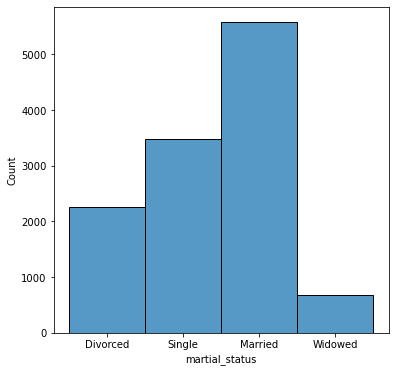

In [63]:
plt.figure(figsize=(6,6))

sns.histplot(data=train_df,x=train_df.martial_status)


<AxesSubplot:xlabel='age', ylabel='mean_spending'>

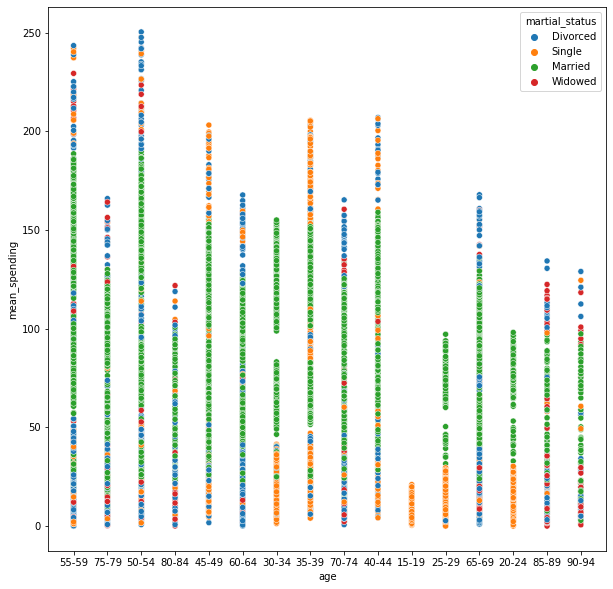

In [64]:
plt.figure(figsize=(10,10))

sns.scatterplot(data=train_df,x="age",y='mean_spending',hue='martial_status')

In [65]:

X = train_df.drop('label', axis=1)
y = train_df['label']

categorical_features = ['gender', 'location']
X_encoded = pd.get_dummies(X, columns=categorical_features)

label_encoder = LabelEncoder()
X_encoded['age'] = label_encoder.fit_transform(X['age'])
X_encoded['martial_status'] = label_encoder.fit_transform(X['martial_status'])

X_encoded

,age,martial_status,products_count,monthly_count,mean_spending,gender_F,gender_M,gender_Other,location_City,location_Town
0,8,0,56,2,46.09,0,1,0,1,0
1,12,0,27,5,10.87,1,0,0,1,0
2,12,2,79,9,23.97,0,1,0,1,0
3,7,0,72,6,28.03,1,0,0,1,0
4,13,1,120,8,35.10,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
11995,8,1,164,2,144.33,1,0,0,1,0
11996,8,0,71,2,42.58,1,0,0,1,0
11997,1,2,22,6,9.97,0,1,0,1,0
11998,4,2,38,3,31.47,1,0,0,1,0


In [66]:
numeric_features = ['products_count', 'monthly_count', 'mean_spending']
scaler = StandardScaler()
X_encoded[numeric_features] = scaler.fit_transform(X[numeric_features])

<AxesSubplot:xlabel='mean_spending', ylabel='Count'>

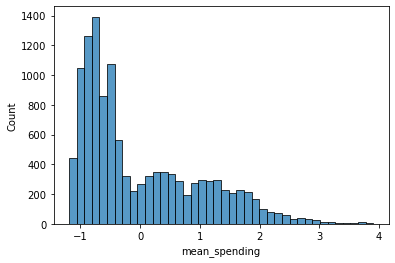

In [67]:
sns.histplot(data=X_encoded,x='mean_spending')

In [69]:
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_model = None
best_f1_macro = 0


for name, model in models:

    grid_search = GridSearchCV(model, param_grid[name], scoring='f1_macro', cv=5)
    grid_search.fit(X_train, y_train)
    

    best_model_cv = grid_search.best_estimator_
    f1_macro_cv = grid_search.best_score_
    

    y_pred = best_model_cv.predict(X_test)
    f1_macro_val = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']
    

    print(f"Model: {name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"F1-Score (macro) - CV: {f1_macro_cv:.4f}")
    print(f"F1-Score (macro) - Validation: {f1_macro_val:.4f}")
    print("-------------------------------------------")
    

    if f1_macro_val > best_f1_macro:
        best_model = best_model_cv
        best_f1_macro = f1_macro_val

Model: Logistic Regression
Best Hyperparameters: {'C': 10}
F1-Score (macro) - CV: 0.6257
F1-Score (macro) - Validation: 0.6337
-------------------------------------------
Model: Decision Tree
Best Hyperparameters: {'max_depth': 10}
F1-Score (macro) - CV: 0.8561
F1-Score (macro) - Validation: 0.8676
-------------------------------------------
Model: Random Forest
Best Hyperparameters: {'n_estimators': 300}
F1-Score (macro) - CV: 0.8676
F1-Score (macro) - Validation: 0.8859
-------------------------------------------
Model: Support Vector Machine
Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}
F1-Score (macro) - CV: 0.7756
F1-Score (macro) - Validation: 0.8033
-------------------------------------------


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9200
Precision: 0.8963
Recall: 0.8830
F1-score: 0.8859


In [70]:
test_df.head(5)

,gender,age,martial_status,location,products_count,monthly_count,mean_spending
0,M,85-89,Divorced,City,47,7,15.85
1,F,70-74,Divorced,City,78,5,25.43
2,F,50-54,Married,City,72,2,154.67
3,F,50-54,Divorced,City,42,2,31.46
4,F,80-84,Divorced,Town,67,9,11.24


In [71]:
categorical_features = ['gender', 'location']
test_encoded = pd.get_dummies(test_df, columns=categorical_features)

label_encoder = LabelEncoder()
test_encoded['age'] = label_encoder.fit_transform(test_df['age'])
test_encoded['martial_status'] = label_encoder.fit_transform(test_df['martial_status'])

test_encoded

,age,martial_status,products_count,monthly_count,mean_spending,gender_F,gender_M,gender_Other,location_City,location_Town
0,14,0,47,7,15.85,0,1,0,1,0
1,11,0,78,5,25.43,1,0,0,1,0
2,7,1,72,2,154.67,1,0,0,1,0
3,7,0,42,2,31.46,1,0,0,1,0
4,13,0,67,9,11.24,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2995,6,1,285,13,36.53,1,0,0,1,0
2996,6,1,199,5,64.73,0,1,0,1,0
2997,4,1,240,6,78.21,0,1,0,0,1
2998,7,1,165,3,121.89,0,1,0,1,0


In [76]:
y_pred = best_model.predict(test_encoded)

In [102]:
import json
predictions_dict = {"target": {}}


for i, pred in enumerate(y_pred):
    predictions_dict["target"][str(i)] = int(pred)

predictions_json = json.dumps(predictions_dict)

with open('predictions.json', 'w') as f:
    f.write(predictions_json)